In [ ]:
!pip install gdown  # Ensure gdown is installed

In [ ]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1iQRpRfxv_5VB2OqY_5ij6jX6MbsHFLvk"
output_file = "Cracks_Segmentation.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1iQRpRfxv_5VB2OqY_5ij6jX6MbsHFLvk
From (redirected): https://drive.google.com/uc?id=1iQRpRfxv_5VB2OqY_5ij6jX6MbsHFLvk&confirm=t&uuid=aa1887cf-1638-4d5c-9b2e-d5c383a1842e
To: /content/Cracks_Segmentation.zip
100%|██████████| 126M/126M [00:03<00:00, 39.9MB/s]


'Cracks_Segmentation.zip'

In [ ]:
import zipfile
z = zipfile.ZipFile('/content/Cracks_Segmentation.zip')
z.extractall()

In [ ]:
import os
import shutil

src = 'Cracks_Segmentation'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Cracks_Segmentation' to 'datasets/Cracks_Segmentation' successfully.


## **Importing libraries**

In [ ]:
import yaml

# Define YAML configuration
data = {
    'path': 'Cracks_Segmentation',
    'train': 'train/images',
    'val': 'valid/images',
    'nc': 1,
    'names': ['Leaf Disease']
}

# Save to pothole.yaml
with open('Cracks_Segmentation.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Cracks_Segmentation.yaml created successfully!")


Cracks_Segmentation.yaml created successfully!


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO('yolov8m-seg.pt')  # 'yolov8s.pt' or 'yolov8m.pt' for better accuracy

# Train the model and save only the best checkpoint
model.train(
    data='Cracks_Segmentation.yaml',
    epochs=20,
    imgsz=640,
    batch=8,
    name='Cracks_Segmentation_yolov8',
    save=True,
    save_period=-1,  # Don't save every epoch
    patience=20,     # Early stopping if no improvement for 20 epochs (optional)
    val=False         # Run validation during training to select best model
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 52.4M/52.4M [00:00<00:00, 132MB/s]


Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Cracks_Segmentation.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Cracks_Segmentation_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, po

100%|██████████| 755k/755k [00:00<00:00, 26.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              


  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384, 576, 3, 2]              
  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 106MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 14.7±1.2 MB/s, size: 27.4 KB)


train: Scanning /content/datasets/Cracks_Segmentation/train/labels... 3717 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3717/3717 [00:04<00:00, 867.07it/s] 

train: New cache created: /content/datasets/Cracks_Segmentation/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.0±5.9 MB/s, size: 21.3 KB)


val: Scanning /content/datasets/Cracks_Segmentation/valid/labels... 200 images, 1 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 415.27it/s]

val: New cache created: /content/datasets/Cracks_Segmentation/valid/labels.cache


Plotting labels to runs/segment/Cracks_Segmentation_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/Cracks_Segmentation_yolov8
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.94G      1.486      1.867      1.659      1.409         13        640: 100%|██████████| 465/465 [02:58<00:00,  2.60it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.19G      1.534      1.761      1.574      1.441         13        640: 100%|██████████| 465/465 [02:54<00:00,  2.66it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.26G      1.416      1.727       1.42      1.378         14        640: 100%|██████████| 465/465 [02:53<00:00,  2.68it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.52G      1.307        1.7      1.332      1.308         11        640: 100%|██████████| 465/465 [02:53<00:00,  2.68it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20       4.6G      1.193      1.628      1.214      1.247         10        640: 100%|██████████| 465/465 [02:53<00:00,  2.68it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.85G      1.151      1.593      1.141      1.226         14        640: 100%|██████████| 465/465 [02:53<00:00,  2.68it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.92G      1.127      1.615      1.096      1.211         15        640: 100%|██████████| 465/465 [02:53<00:00,  2.68it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.18G      1.076      1.584      1.035      1.198         16        640: 100%|██████████| 465/465 [02:52<00:00,  2.69it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.25G      1.034      1.544      1.002      1.181          9        640: 100%|██████████| 465/465 [02:53<00:00,  2.68it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20       5.5G      1.015      1.528     0.9632      1.166         16        640: 100%|██████████| 465/465 [02:52<00:00,  2.70it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.58G      1.021      1.176      1.068        1.3          9        640: 100%|██████████| 465/465 [02:53<00:00,  2.68it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.66G     0.9667      1.167       1.03      1.258          5        640: 100%|██████████| 465/465 [02:52<00:00,  2.69it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.91G     0.9482      1.154     0.9646      1.245         10        640: 100%|██████████| 465/465 [02:52<00:00,  2.70it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.99G     0.9073      1.135     0.9254      1.219          6        640: 100%|██████████| 465/465 [02:52<00:00,  2.70it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      6.24G     0.8703      1.134     0.8881      1.203          7        640: 100%|██████████| 465/465 [02:52<00:00,  2.70it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      6.32G     0.8272      1.124     0.8581      1.175          5        640: 100%|██████████| 465/465 [02:52<00:00,  2.70it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.57G     0.7884      1.105     0.8141      1.153          6        640: 100%|██████████| 465/465 [02:52<00:00,  2.70it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.65G     0.7625      1.102     0.7692      1.144          5        640: 100%|██████████| 465/465 [02:52<00:00,  2.69it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20       6.9G     0.7439       1.08      0.747      1.138          6        640: 100%|██████████| 465/465 [02:52<00:00,  2.70it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.97G     0.7108      1.074     0.6946      1.112          9        640: 100%|██████████| 465/465 [02:52<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/13 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8%|▊         | 1/13 [00:00<00:05,  2.20it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  15%|█▌        | 2/13 [00:01<00:06,  1.63it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]


                   all        200        249       0.82      0.733      0.814      0.623      0.784      0.622      0.662      0.222

20 epochs completed in 1.000 hours.
Optimizer stripped from runs/segment/Cracks_Segmentation_yolov8/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/Cracks_Segmentation_yolov8/weights/best.pt, 54.8MB

Validating runs/segment/Cracks_Segmentation_yolov8/weights/best.pt...
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,222,963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/13 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8%|▊         | 1/13 [00:00<00:04,  2.93it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  15%|█▌        | 2/13 [00:00<00:05,  2.17it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]


                   all        200        249      0.821      0.735      0.814      0.623      0.784      0.622      0.662      0.222
Speed: 0.6ms preprocess, 12.5ms inference, 0.1ms loss, 4.0ms postprocess per image
Results saved to runs/segment/Cracks_Segmentation_yolov8


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc58bc1f510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
import numpy as np

def draw_segmentation(image, mask, class_colors):

    # Define transparency level (0 to 1)
    alpha = 0.2  # 50% transparency

    # Create a colored overlay of the same shape as the image
    overlay = np.zeros_like(image, dtype=np.uint8)

    for class_id in range(len(class_colors)):
        if class_id == 0:
            continue  # Skip background class
        class_mask = (mask == class_id)
        color = class_colors[class_id]
        for c in range(3):
            overlay[..., c][class_mask] = color[c]

    # ✅ Fixed: Convert PIL image to NumPy before resizing
    image = np.array(image)  # Convert PIL to NumPy

    # Create a copy to preserve original image
    blended_image = image.copy()

    # Blend for all class masks
    for class_id in range(len(class_colors)):
        if class_id == 0:
            continue
        class_mask = (mask == class_id)
        for c in range(3):  # For each color channel
            blended_image[..., c][class_mask] = (
                image[..., c][class_mask] * (1 - alpha) +
                overlay[..., c][class_mask] * alpha
            ).astype(np.uint8)

    return blended_image


image 1/1 /content/datasets/Cracks_Segmentation/test/images/2205.rf.eaf969e5ee1bad463953679d0f0a317f.jpg: 640x640 1 Leaf Disease, 49.2ms
Speed: 4.0ms preprocess, 49.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Cracks_Segmentation/test/images/2506.rf.0293f921d67e517ebc9ee35b7c32dc63.jpg: 640x640 1 Leaf Disease, 45.7ms
Speed: 4.8ms preprocess, 45.7ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Cracks_Segmentation/test/images/2137.rf.44786d7aeaf45f9497f47125a5bab284.jpg: 640x640 1 Leaf Disease, 45.7ms
Speed: 3.8ms preprocess, 45.7ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Cracks_Segmentation/test/images/3481.rf.df8774688622b789d11a98521eb9ea1f.jpg: 640x640 1 Leaf Disease, 29.5ms
Speed: 5.3ms preprocess, 29.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Cracks_Segmentation/test/images

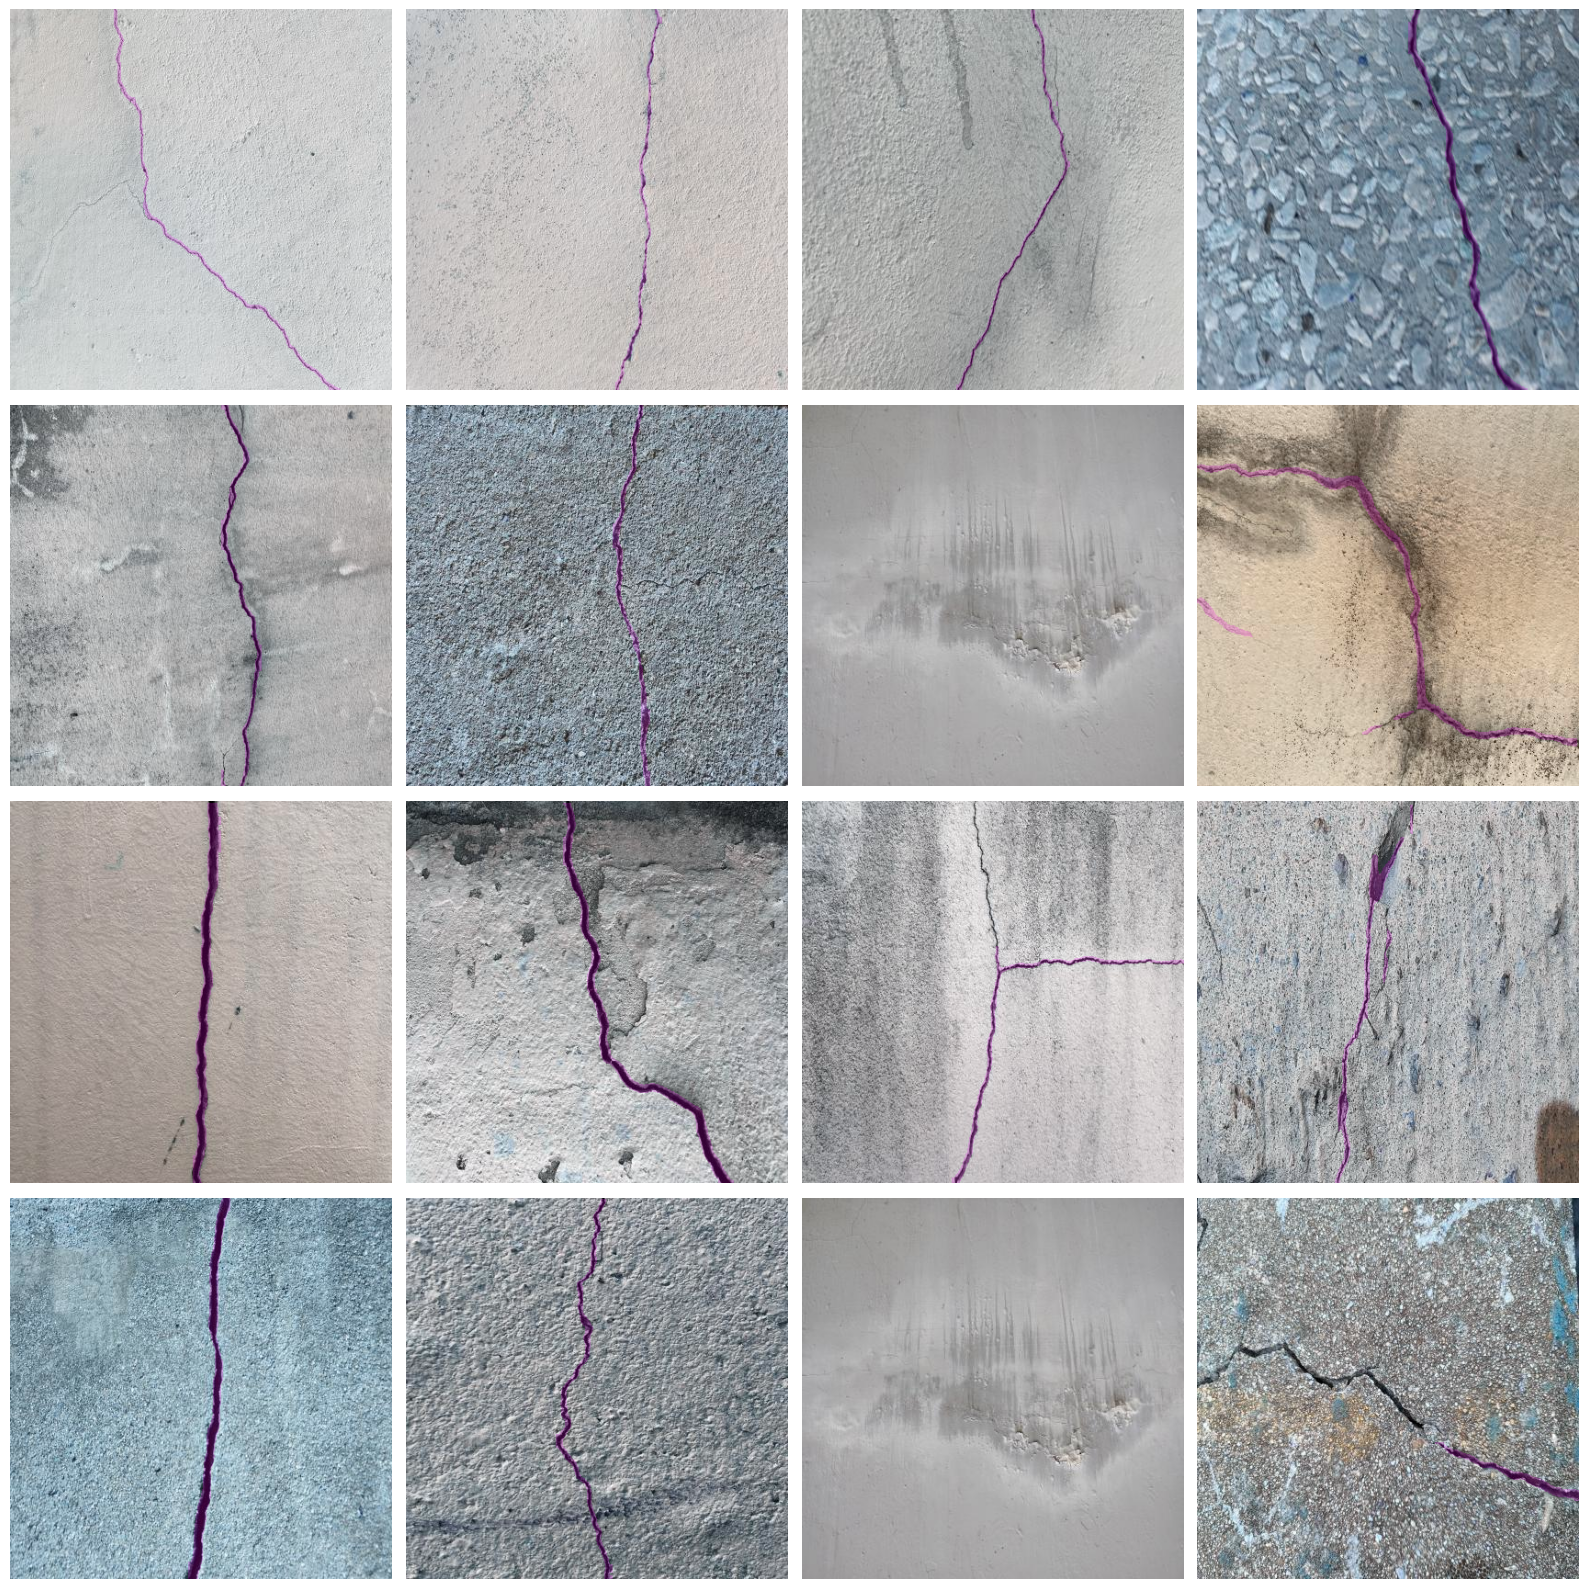

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model
model = YOLO('runs/segment/Cracks_Segmentation_yolov8/weights/best.pt')

# Test images directory
test_images_dir = 'datasets/Cracks_Segmentation/test/images'

# Define colors for visualization
color_sample = {
    0 : (0, 0, 0),
    1 : (255, 0, 255),      # Green
}

image_files = os.listdir(test_images_dir)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_name = random.choice(image_files)
    img_path = os.path.join(test_images_dir, img_name)
    image = cv2.imread(img_path)
    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(img_path)[0]
    # print(results)

    if results.masks:
      # Draw segmentation masks
      for seg in results.masks.data:
          mask = seg.cpu().numpy()
          # Resize mask to match image dimensions
          mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))
          image = draw_segmentation(image_rgb, mask_resized, color_sample)

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    ax[idx].imshow(image_rgb)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
